In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
print(tf.__version__)


2.12.0


In [3]:
raw_dataset=pd.read_csv("shaleporV1.csv",sep=",")

In [4]:
shaleporV1 = raw_dataset.copy()
shaleporV1.head()

,Well,Porosity_%,Age_BA,Depth_km,TOC_%,Requ_%,Quartz_%,Feldspar_%,Clay_%,Carbonate_%,Pyrite_%,BI_%
0,Barnett_LLCA_1H,6.3,0.325,2.5851,2.7,1.86,54.2,11.4,27.1,4.7,2.0,0.70
1,Barnett_LLCA_1H,7.7,0.326,2.5892,2.6,1.86,41.8,12.1,35.3,6.8,2.2,0.62
2,Barnett_LLCA_1H,3.9,0.326,2.5934,1.4,1.86,47.0,6.2,22.6,21.3,1.4,0.76
3,Barnett_LLCA_1H,4.3,0.326,2.5959,1.7,1.86,45.9,6.5,23.7,14.2,7.5,0.72
4,Barnett_LLCA_1H,6.2,0.327,2.5991,2.5,1.86,38.9,9.1,32.9,16.3,2.1,0.64


In [5]:
shaleporV1.shape


(1148, 12)

In [6]:
shaleporV1.describe()

,Porosity_%,Age_BA,Depth_km,TOC_%,Requ_%,Quartz_%,Feldspar_%,Clay_%,Carbonate_%,Pyrite_%,BI_%
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,4.896899,0.274268,2.620440,3.465958,1.629373,32.250383,8.772404,32.314983,22.473798,2.882056,0.637359
std,1.882841,0.155369,0.899567,1.969073,0.747745,11.036565,3.861187,12.887978,20.989373,1.563899,0.133071
min,1.660000,0.086000,0.704300,1.010000,0.620000,5.700000,1.200000,2.400000,1.000000,0.000000,0.322000
25%,3.600000,0.094000,1.907800,2.040000,0.960000,23.000000,6.000000,22.000000,7.000000,2.000000,0.550000
50%,4.500000,0.331000,2.375300,3.040000,1.400000,34.900000,8.000000,36.000000,13.480000,2.400000,0.610000
75%,6.000000,0.437000,3.096550,4.000000,2.510000,40.000000,11.000000,41.900000,32.000000,4.000000,0.750000
max,10.470000,0.456000,4.883320,12.800000,2.640000,64.700000,24.900000,71.000000,85.600000,8.800000,0.940000


In [7]:
shaleporV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Well         1148 non-null   object 
 1   Porosity_%   1148 non-null   float64
 2   Age_BA       1148 non-null   float64
 3   Depth_km     1148 non-null   float64
 4   TOC_%        1148 non-null   float64
 5   Requ_%       1148 non-null   float64
 6   Quartz_%     1148 non-null   float64
 7   Feldspar_%   1148 non-null   float64
 8   Clay_%       1148 non-null   float64
 9   Carbonate_%  1148 non-null   float64
 10  Pyrite_%     1148 non-null   float64
 11  BI_%         1148 non-null   float64
dtypes: float64(11), object(1)
memory usage: 107.8+ KB


In [8]:
corr_matrix = shaleporV1.corr()


In [9]:
corr_matrix["Porosity_%"].sort_values(ascending=False)

Porosity_%     1.000000
Depth_km       0.677456
TOC_%          0.309901
Carbonate_%    0.204004
Pyrite_%       0.034403
Requ_%        -0.011152
Clay_%        -0.031191
BI_%          -0.036460
Feldspar_%    -0.047513
Age_BA        -0.196413
Quartz_%      -0.425452
Name: Porosity_%, dtype: float64

<Figure size 4000x500 with 0 Axes>

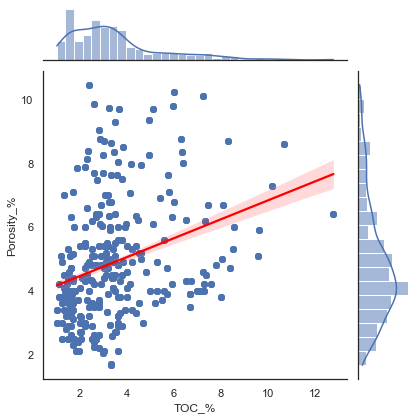

In [10]:
sns.set_theme(style="white")
plt.figure(figsize = (40,5), dpi = (100))
sns.jointplot(x = shaleporV1['TOC_%'], y = shaleporV1['Porosity_%'], kind='reg', line_kws={"color": "red"})


<Figure size 4000x500 with 0 Axes>

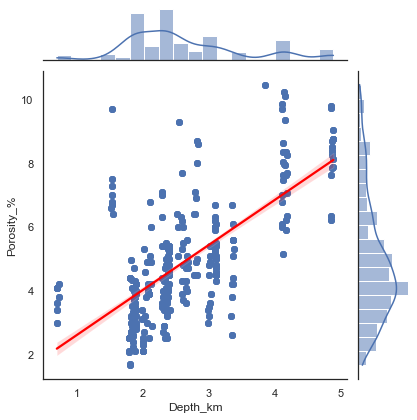

In [11]:
sns.set_theme(style="white")
plt.figure(figsize = (40,5), dpi = (100))
sns.jointplot(x = shaleporV1['Depth_km'], y = shaleporV1['Porosity_%'], kind='reg', line_kws={"color": "red"})


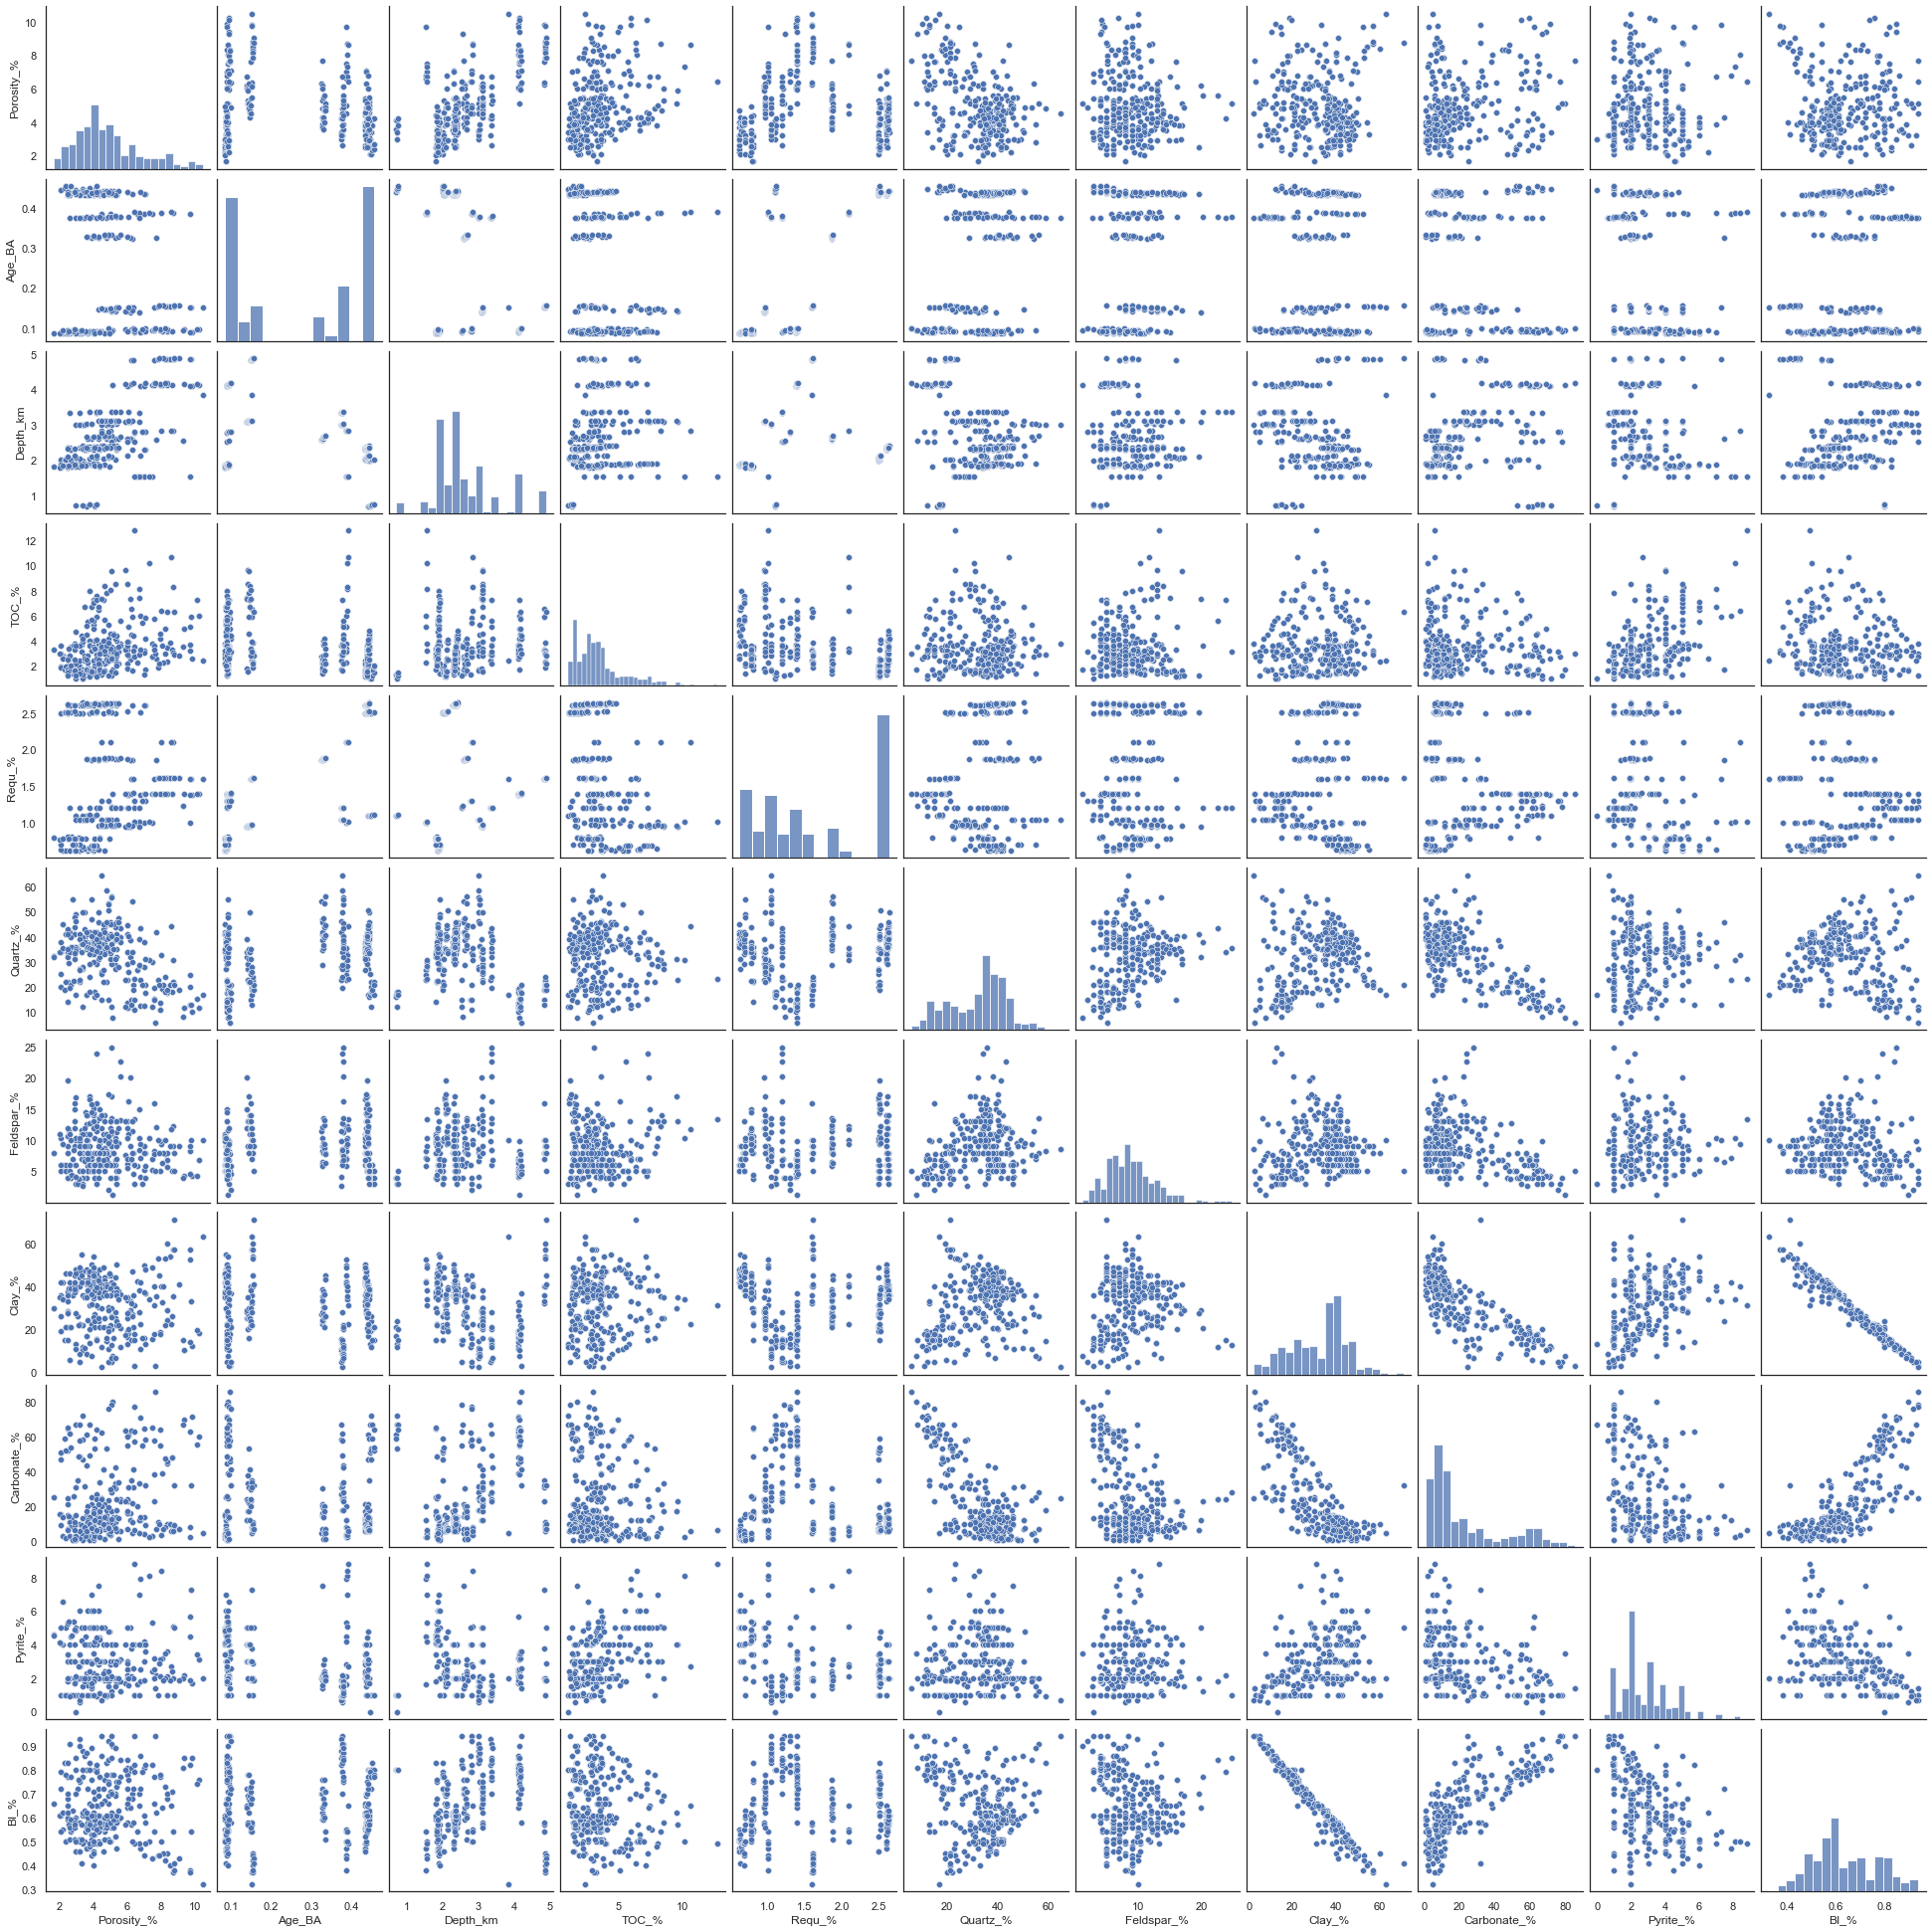

In [12]:
sns.pairplot(shaleporV1)

In [13]:
X = shaleporV1.iloc[:, 2:].values 
y = shaleporV1.iloc[:, 1].values


In [14]:
X

array([[ 0.325 ,  2.5851,  2.7   , ...,  4.7   ,  2.    ,  0.7   ],
       [ 0.326 ,  2.5892,  2.6   , ...,  6.8   ,  2.2   ,  0.62  ],
       [ 0.326 ,  2.5934,  1.4   , ..., 21.3   ,  1.4   ,  0.76  ],
       ...,
       [ 0.441 ,  2.125 ,  3.81  , ...,  7.7   ,  4.8   ,  0.74  ],
       [ 0.441 ,  2.13  ,  4.12  , ...,  6.7   ,  3.1   ,  0.55  ],
       [ 0.442 ,  2.135 ,  2.52  , ...,  6.6   ,  1.7   ,  0.57  ]])

In [15]:
y

array([6.3, 7.7, 3.9, ..., 4.9, 4.2, 2.9])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
X_train

array([[ 0.093  ,  4.11931,  3.3    , ..., 48.3    ,  2.4    ,  0.71   ],
       [ 0.434  ,  2.361  ,  1.7    , ..., 12.     ,  3.     ,  0.56   ],
       [ 0.433  ,  2.025  ,  1.48   , ...,  7.8    ,  2.8    ,  0.52   ],
       ...,
       [ 0.376  ,  3.352  ,  2.9    , ..., 33.2    ,  1.     ,  0.7    ],
       [ 0.1    ,  4.18502,  4.13   , ..., 32.3    ,  3.6    ,  0.58   ],
       [ 0.097  ,  4.16216,  4.45   , ..., 63.6    ,  2.1    ,  0.81   ]])

In [18]:
X_test

array([[ 0.093 ,  1.9023,  7.3   , ...,  2.    ,  4.    ,  0.45  ],
       [ 0.1   ,  2.8039,  3.1   , ..., 76.    ,  1.    ,  0.92  ],
       [ 0.439 ,  2.3836,  3.4   , ..., 14.    ,  2.    ,  0.59  ],
       ...,
       [ 0.089 ,  1.8844,  6.7   , ...,  6.    ,  6.    ,  0.51  ],
       [ 0.327 ,  2.6067,  2.3   , ..., 15.    ,  2.1   ,  0.59  ],
       [ 0.434 ,  2.36  ,  1.5   , ..., 10.    ,  4.    ,  0.56  ]])

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [20]:
X_train

array([[-1.16452931,  1.66209883, -0.0850976 , ...,  1.24863477,
        -0.32483241,  0.57520848],
       [ 1.0255956 , -0.28037585, -0.89274802, ..., -0.49528014,
         0.05389925, -0.56236617],
       [ 1.01917295, -0.65156836, -1.00379995, ..., -0.69705541,
        -0.07234464, -0.86571942],
       ...,
       [ 0.65308169,  0.81442109, -0.28701021, ...,  0.5232046 ,
        -1.20853962,  0.49937017],
       [-1.11957074,  1.73469127,  0.33387105, ...,  0.47996704,
         0.43263091, -0.41068955],
       [-1.1388387 ,  1.70943692,  0.49540113, ...,  1.98367328,
        -0.51419824,  1.33359158]])

In [21]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


In [22]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dense_layer_2 = Dense(256, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(128, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(64, activation='relu')(dense_layer_3)
dense_layer_5 = Dense(64, activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_5)

In [23]:
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [24]:
my_model = model


In [25]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 178,177
Trainable params: 178,177
Non-trainable

In [26]:
history = model.fit(X_train, y_train, batch_size=1, epochs=300, verbose=1, validation_split=0.2)


Epoch 1/300
688/688 [==============================] - 6s 6ms/step - loss: 2.8228 - mean_squared_error: 2.8228 - val_loss: 1.1355 - val_mean_squared_error: 1.1355
Epoch 2/300
688/688 [==============================] - 4s 5ms/step - loss: 1.5734 - mean_squared_error: 1.5734 - val_loss: 0.9279 - val_mean_squared_error: 0.9279
Epoch 3/300
688/688 [==============================] - 3s 5ms/step - loss: 1.2985 - mean_squared_error: 1.2985 - val_loss: 0.9472 - val_mean_squared_error: 0.9472
Epoch 4/300
688/688 [==============================] - 5s 7ms/step - loss: 1.0559 - mean_squared_error: 1.0559 - val_loss: 0.7752 - val_mean_squared_error: 0.7752
Epoch 5/300
688/688 [==============================] - 4s 5ms/step - loss: 1.0454 - mean_squared_error: 1.0454 - val_loss: 0.8057 - val_mean_squared_error: 0.8057
Epoch 6/300
688/688 [==============================] - 3s 4ms/step - loss: 0.9380 - mean_squared_error: 0.9380 - val_loss: 0.6434 - val_mean_squared_error: 0.6434
Epoch 7/300
688/688 [=

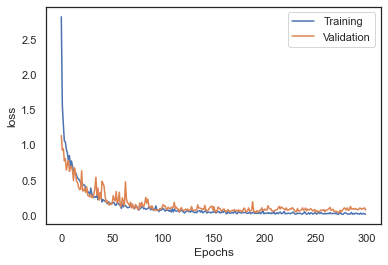

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training","Validation"])

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))
pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))


27/27 [==============================] - 0s 2ms/step
0.17639279405905448
9/9 [==============================] - 0s 2ms/step
0.2039481458168459


In [29]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

9/9 [==============================] - 0s 3ms/step - loss: 0.0416 - mean_squared_error: 0.0416
Test Score: 0.04159485176205635
Test Accuracy: 0.04159485176205635


In [30]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels : ' ,y_test[:10])

9/9 [==============================] - 0s 3ms/step
Predicted labels:  [[4.]
 [5.]
 [5.]
 [3.]
 [6.]
 [5.]
 [6.]
 [5.]
 [3.]
 [4.]]
Actual labels :  [4.  4.9 5.3 3.  6.  4.8 6.  4.6 3.  4. ]


In [31]:
from sklearn.metrics import r2_score
y_true = np.round(predictions)
y_pred = y_test
r2_score(y_true, y_pred)

0.9601758827944041

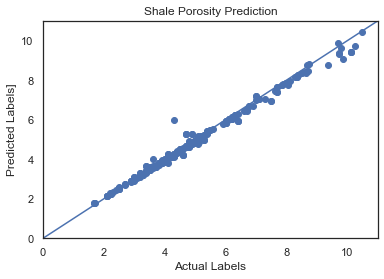

In [32]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels]')
plt.title('Shale Porosity Prediction')
lims = [0, 11]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [33]:
my_model.save('./saved_models/my_tf_model')

INFO:tensorflow:Assets written to: ./saved_models/my_tf_model\assets


INFO:tensorflow:Assets written to: ./saved_models/my_tf_model\assets


In [34]:
my_tf_saved_model = tf.keras.models.load_model(
 './saved_models/my_tf_model')
my_tf_saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 178,177
Trainable params: 178,177
Non-trainable

In [35]:
from tensorflow.keras.models import save_model, load_model
import pandas as pd

In [36]:
model = load_model('./saved_models/my_tf_model',
 custom_objects=None,
 compile=True)

In [37]:
raw_dataset=pd.read_csv("dadasshaleporositypredict.csv",sep=",")


In [38]:
dadasshaleporositypredict = raw_dataset.copy()
dadasshaleporositypredict.head()


,Well,Age_BA,Depth_km,TOC_%,Requ_%,Quartz_%,Feldspar_%,Clay_%,Carbonate_%,Pyrite_%,BI
0,ABDULAZIZ-1,0.44,2.74,2.76,1.21,24.3,0.0,69.6,3.1,3.0,0.27
1,ABDULAZIZ-1,0.44,2.75,2.57,1.22,33.2,0.0,50.3,17.0,0.0,0.49
2,ABDULAZIZ-1,0.44,2.76,2.24,1.22,29.3,9.0,52.1,10.0,0.0,0.47
3,ABDULAZIZ-1,0.44,2.78,1.64,1.21,25.3,25.7,43.1,6.0,0.0,0.56
4,ABDULAZIZ-1,0.44,2.79,3.15,1.21,16.0,0.0,75.8,7.2,1.1,0.23


In [39]:
X_new = dadasshaleporositypredict.iloc[:, 1:].values

In [40]:
X_new

array([[ 0.44,  2.74,  2.76, ...,  3.1 ,  3.  ,  0.27],
       [ 0.44,  2.75,  2.57, ..., 17.  ,  0.  ,  0.49],
       [ 0.44,  2.76,  2.24, ..., 10.  ,  0.  ,  0.47],
       ...,
       [ 0.44,  2.85,  2.17, ...,  3.2 ,  6.2 ,  0.31],
       [ 0.44,  2.86,  1.01, ...,  3.2 ,  4.8 ,  0.25],
       [ 0.44,  2.87,  1.56, ...,  4.5 ,  3.4 ,  0.18]])

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X_new)

In [42]:
X_new

array([[ 0.        , -0.27489757, -0.5022611 , ..., -1.06537801,
         0.30704503, -1.41656716],
       [ 0.        , -0.2405777 , -0.57145337, ..., -0.38678765,
        -0.9486652 , -0.26318734],
       [ 0.        , -0.20625783, -0.69162942, ..., -0.7285238 ,
        -0.9486652 , -0.36804005],
       ...,
       [ 0.        ,  0.10262103, -0.71712131, ..., -1.06049606,
         1.64646927, -1.20686174],
       [ 0.        ,  0.1369409 , -1.13955834, ..., -1.06049606,
         1.06047116, -1.52141987],
       [ 0.        ,  0.17126077, -0.93926492, ..., -0.99703078,
         0.47447306, -1.88840436]])

In [43]:
print(model.predict(X_new))

5/5 [==============================] - 0s 3ms/step
[[6.261177 ]
 [4.746306 ]
 [4.2334757]
 [4.031775 ]
 [7.932075 ]
 [3.9788616]
 [7.2632113]
 [4.8810034]
 [8.859305 ]
 [7.8056645]
 [5.0987206]
 [5.9806685]
 [6.878346 ]
 [8.0445   ]
 [7.6343284]
 [8.496563 ]
 [9.01779  ]
 [8.790062 ]
 [4.268491 ]
 [5.044116 ]
 [5.0090256]
 [4.9596453]
 [5.9352   ]
 [5.492044 ]
 [4.7895465]
 [4.450198 ]
 [6.1239624]
 [4.489719 ]
 [4.288119 ]
 [4.299861 ]
 [7.047893 ]
 [4.2352686]
 [5.6876154]
 [5.018695 ]
 [5.585394 ]
 [4.7458987]
 [6.0432534]
 [5.8108277]
 [5.062154 ]
 [5.6891756]
 [4.981439 ]
 [5.3472133]
 [4.4274006]
 [5.139576 ]
 [4.540848 ]
 [5.3562555]
 [6.0823503]
 [6.3801656]
 [4.654426 ]
 [5.3020897]
 [6.5881233]
 [2.9623783]
 [4.851681 ]
 [2.6954973]
 [2.931628 ]
 [6.326737 ]
 [5.066354 ]
 [5.4410133]
 [5.532493 ]
 [4.197731 ]
 [4.812005 ]
 [4.7944465]
 [4.8347874]
 [5.084507 ]
 [6.349444 ]
 [5.4611135]
 [6.2018642]
 [6.684165 ]
 [4.8541403]
 [4.2151656]
 [5.8254786]
 [6.1625953]
 [4.191994 ]
